In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from delay.delay import *

In [2]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [21]:
def whereGreater(x, threshold):
    t = 0
    while(x[t] < threshold):
        t += 1
    return slice(t, len(x))

def whereInside(x, bottom, top):
    b = 0
    t = 0
    while(x[b] < bottom):
        b += 1
    t = b
    while(x[t] < top):
        t += 1
    return slice(b, t)

def whereSmaller(x, threshold):
    t = 0
    while(x[t] < threshold):
        t += 1
    return slice(0, t)

Mean squared error: 2.67
Variance score: 0.02
Line: -0.03x + -0.718835
Average: -1.10


Mean squared error: 155.31
Variance score: 0.00
Line: -0.04x + 0.083968
Average: -2.21


Mean squared error: 1079.46
Variance score: 0.01
Line: 0.21x + -20.764849
Average: 2.25




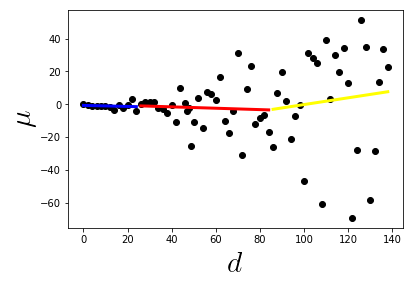

In [47]:
ds = [0 ,  2 ,  4 ,  6 ,  8 ,  10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 47, 48, 49, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98, 100 ,102 ,104 ,106 ,108 ,110 ,112 ,114 ,116 ,118 ,120 ,122 ,124 ,126 ,128 ,130 ,132 ,134 ,136 ,138 ]
mus = [ 0.07720922790772092, -0.35357646423535766, -0.8234917650823492, -0.9028109718902811, -1.1494385056149439, -1.3593364066359337, -1.8966910330896691, -3.5882941170588296, -0.4896251037489625, -2.206847931520685, -0.5134448655513445,  2.9382006179938203, -3.973290267097329, -0.12418875811241888,  1.6061939380606194,  1.1624383756162437,  1.2522374776252236, -2.0625293747062527, -2.6820031799682003, -5.1226187738122615, -0.6877831221687783, -10.862221377786222,  9.643253567464326,  0.9015009849901501, -4.082149178508215, -2.4567054329456703, -25.32921670783292, -10.75690243097569,  3.6982730172698273, -14.668323316766832,  7.157858421415786,  6.3714862851371485,  2.5578044219557805,  16.77650223497765, -10.030229697703023, -17.296677033229667, -4.393166068339316,  30.948060519394804, -31.047719522804773,  9.270357296427036,  23.105718942810572, -11.757112428875711, -8.239867601323986, -6.67290327096729, -16.948080519194807, -26.345146548534515,  6.992360076399236,  19.511734882651172,  1.9128308716912832, -21.070379296207037, -7.082319176808232, -0.7091829081709183, -46.938160618393816,  31.32941670583294,  28.10612893871061,  24.973540264597354, -60.725962740372594,  39.35943640563595,  3.3877361226387737,  30.048429515704843,  19.55851441485585,  34.41792582074179,  12.97720022799772, -69.23969760302397, -27.897251027489727,  51.14171858281417,  34.789342106578935, -58.61244387556125, -28.497825021749783,  13.545614543854562,  33.371236287637124,  22.577024229757704]

plt.scatter(ds, mus,  color='black')

parts = [25, 85]

ds = np.array(ds).reshape(-1,1)
slices = [whereSmaller(ds, parts[0]), whereInside(ds, parts[0], parts[1]), whereGreater(ds, parts[1])]
dsParts = [ds[slices[s]] for s in (0,1,2)]
musParts = [mus[slices[s]] for s in (0,1,2)]
            
regr.fit(dsParts[0], musParts[0])
mus_pred = regr.predict(dsParts[0])
print("Mean squared error: %.2f" % mean_squared_error(musParts[0], mus_pred))
print('Variance score: %.2f' % r2_score(musParts[0], mus_pred))
plt.plot(dsParts[0], mus_pred, color='blue', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
print('Average: ' + '%.2f' %  np.mean(musParts[0]))
print('\n')
            
plt.ylabel(r'$\mu$', usetex=True, fontsize=30)
plt.xlabel(r'$d$', usetex=True, fontsize=30);
            
regr.fit(dsParts[1], musParts[1])
mus_pred = regr.predict(dsParts[1])
print("Mean squared error: %.2f" % mean_squared_error(musParts[1], mus_pred))
print('Variance score: %.2f' % r2_score(musParts[1], mus_pred))
plt.plot(dsParts[1], mus_pred, color='red', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
print('Average: ' + '%.2f' % np.mean(musParts[1]))
print('\n')
            
regr.fit(dsParts[2], musParts[2])
mus_pred = regr.predict(dsParts[2])
print("Mean squared error: %.2f" % mean_squared_error(musParts[2], mus_pred))
print('Variance score: %.2f' % r2_score(musParts[2], mus_pred))
plt.plot(dsParts[2], mus_pred, color='yellow', linewidth=3)
print('Line: ' + '%.2fx + %f' % (regr.coef_, regr.intercept_))
print('Average: ' + '%.2f' % np.mean(musParts[2]))
print('\n')